### Задание.

    Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
    Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
    Разделите данные на выборку для обучения и тестирования
    Постройте модель LDA
    Визуализируйте предсказания для тестовой выборки и центры классов
    Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
    Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию


######  Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors


In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0,1,1), (1,0.7, 0.7)],
     'green' : [(0, 0.7, 0.7), (1,0.7, 0.7)],
     'blue' : [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


##### Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [5]:
data = data[['sepal length (cm)', 'sepal width (cm)']]
variety = iris.target
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


######  Разделите данные на выборку для обучения и тестирования

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size= 0.25)

In [7]:
len(y_train)

112

###### Постройте модель LDA

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
lda = LinearDiscriminantAnalysis()

In [10]:
# training data
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [11]:
# forecast
lda.predict(X_test)

array([2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0,
       2, 1, 2, 0, 0, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2])

In [12]:
# diff between actual and forecast
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [13]:
result

,0,1
0,2,2
1,2,2
2,0,0
3,1,2
4,2,2
5,1,1
6,1,1
7,2,1
8,2,2
9,2,2


In [14]:
# accuracy
from sklearn.metrics import accuracy_score 

In [15]:
# y_test = actual, vs , lda.predict(X_test) = prediction
accuracy_score(y_test, lda.predict(X_test))

0.8421052631578947

In [16]:
# coeff discriminant lines 
lda.coef_

array([[-5.79670965,  7.54411808],
       [ 1.56895956, -3.54843896],
       [ 4.18534579, -3.89977537]])

In [17]:
lda.means_

array([[4.99459459, 3.41351351],
       [5.94736842, 2.80263158],
       [6.60810811, 2.9972973 ]])

###### Визуализируйте предсказания для тестовой выборки и центры классов

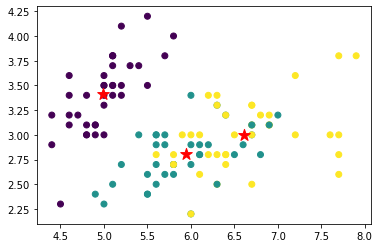

In [18]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
# centroids
plt.scatter(lda.means_[:,0], lda.means_[:,1], c='r', s = 150, marker='*')
plt.show()

###### Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [19]:
sepals = data[['sepal length (cm)', 'sepal width (cm)']]
sepals

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


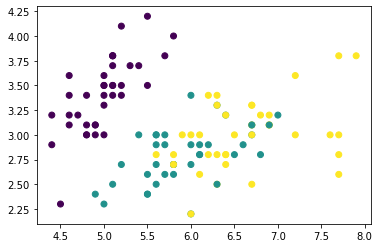

In [20]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train) 
plt.show()

In [21]:
len(X_train)

112

######  Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [22]:
from sklearn.cluster import KMeans

In [23]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', max_iter=300, n_init=10, random_state= 0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

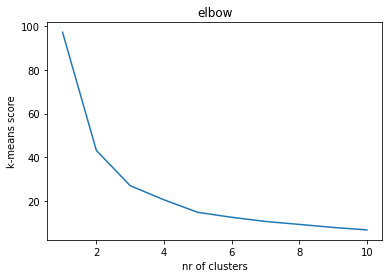

In [24]:
plt.plot(range(1, 11), wcss)
plt.title('elbow')
plt.xlabel('nr of clusters')
plt.ylabel('k-means score')
plt.show()

In [25]:
kmeans = KMeans(n_clusters= 5, init= 'k-means++', max_iter=300, n_init=10, random_state= 0)
y_means = kmeans.fit_predict(X_train)
y_means


array([2, 2, 0, 0, 0, 0, 3, 1, 0, 1, 2, 2, 2, 0, 3, 0, 0, 2, 2, 0, 1, 2,
       1, 0, 4, 0, 1, 2, 0, 2, 2, 4, 3, 2, 1, 3, 1, 2, 1, 0, 4, 4, 0, 1,
       0, 2, 3, 3, 0, 1, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 3, 4, 3, 2, 4,
       1, 2, 0, 3, 0, 1, 0, 0, 3, 3, 3, 4, 2, 0, 1, 2, 2, 0, 0, 3, 3, 0,
       1, 2, 3, 2, 2, 3, 3, 2, 3, 0, 0, 3, 2, 1, 1, 2, 1, 3, 0, 1, 2, 0,
       4, 1])

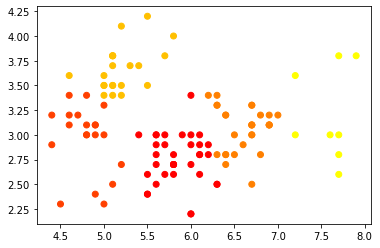

In [27]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], cmap='autumn', c=y_means)

In [29]:
plt.scatter(X_train[:,0], X_train[:, 1], cmap='autumn', c=y_means)

TypeError: '(slice(None, None, None), 0)' is an invalid key